# Machine Learning Final Project



### Goals For now:
- Combine historical oak data, modern oak data based on FIA plot centroids with town boundaries centroids that are within 6 miles of the the TOWN centroid 

In [2]:
from geopy import distance
import pandas as pd
from scipy.spatial.distance import cdist
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [3]:
xavier_hist_oak_path = 'C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/his_oaks.csv'
xavier_mod_oak_path = 'C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/mod_oaks.csv'

In [4]:
#load in historical and modern datasets

hist_oak = pd.read_csv(xavier_hist_oak_path, index_col = False)
hist_oak.drop(hist_oak.columns[[0]], axis=1, inplace=True) #drop dup index col

mod_oak = pd.read_csv(xavier_mod_oak_path)
mod_oak.drop(mod_oak.columns[[0]], axis=1, inplace=True) #drop dup index col

hist_oak #has town name, town centroid

,unique.id,town.name,state,latitude,longitude,oaks.wt
0,1,BERKSHIRE,VT,44.9700,-72.7600,0.000000
1,2,JAY,VT,44.9683,-72.4850,0.000000
2,3,AVERILL,VT,44.9583,-71.6983,0.000000
3,4,Magalloway,ME,44.9100,-70.9300,0.000000
4,5,OldTownCty,ME,44.9000,-68.7100,0.043165
...,...,...,...,...,...,...
696,1257,NaN,NaN,40.3400,-78.9800,0.384000
697,1258,NaN,NaN,40.3200,-79.1200,0.529001
698,1261,NaN,NaN,40.3000,-78.8600,0.362676
699,1266,NaN,NaN,40.2300,-75.8600,0.681819


In [5]:
hist_oak['hist_location'] = list(zip(hist_oak['latitude'],hist_oak['longitude']))

mod_oak['mod_location'] = list(zip(mod_oak['LAT'],mod_oak['LON']))

mod_oak.reset_index(inplace =True)
mod_oak.rename(columns = {'index':'mod_ID'}, inplace = True)
mod_oak #each town can double dip FIA plots so long as they are within radius r

,mod_ID,PLOT,INVYR,LAT,LON,whiteOak,swampWhiteOak,redOak,chestnutOak,blackOak,mod_location
0,0,63,2010,41.149387,-73.609083,0.000000,0.0,0.000000,0.0,0.000000,"(41.149387, -73.609083)"
1,1,190,2010,41.805249,-73.472789,0.000000,0.0,0.000000,0.0,0.000000,"(41.805249, -73.472789)"
2,2,141,2010,41.609005,-73.452925,0.000000,0.0,0.322894,0.0,0.582566,"(41.609005, -73.452925)"
3,3,430,2010,41.884931,-73.440747,0.000000,0.0,0.000000,0.0,0.000000,"(41.884931, -73.440747)"
4,4,36,2010,41.729005,-73.391832,0.018674,0.0,0.571449,0.0,0.039291,"(41.729005, -73.391832)"
...,...,...,...,...,...,...,...,...,...,...,...
1952,1952,20,2010,44.814937,-71.663523,0.000000,0.0,0.000000,0.0,0.000000,"(44.814937, -71.663523)"
1953,1953,642,2010,44.893698,-71.659868,0.000000,0.0,0.000000,0.0,0.000000,"(44.893698, -71.659868)"
1954,1954,1162,2010,44.630900,-71.626165,0.000000,0.0,0.000000,0.0,0.000000,"(44.6309, -71.626165)"
1955,1955,735,2010,44.934766,-71.584043,0.000000,0.0,0.000000,0.0,0.000000,"(44.934766, -71.584043)"


In [6]:
#functions for finding the closest point in an list of points, 

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

#function to match the value of the closest point to the dataframe

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]


# df1 = pd.DataFrame(data1)
# df2 = pd.DataFrame(data2)

# df1['point'] = [(x, y) for x,y in zip(df1['Lat'], df1['Lon'])]
# df2['point'] = [(x, y) for x,y in zip(df2['Lat'], df2['Lon'])]

# df2['closest'] = [closest_point(x, list(df1['point'])) for x in df2['point']]
# df2['zone'] = [match_value(df1, 'point', x, 'Zone') for x in df2['closest']]

# print(df2)

In [7]:
#merge historical and modern data based on the closest centriod

hist_oak_copy = hist_oak.copy()
mod_oak_copy = mod_oak.copy()

mod_oak_copy['closest'] = [closest_point(x,list(hist_oak_copy['hist_location'])) for x in mod_oak_copy['mod_location']]

mod_oak_copy[['hist_id','hist_town','oaks.wt','hist_location','hist_latitude']] = [match_value(hist_oak_copy, 'hist_location', x, ['unique.id','town.name','oaks.wt','hist_location','latitude']) for x in mod_oak_copy['closest']]

mod_oak_copy

,mod_ID,PLOT,INVYR,LAT,LON,whiteOak,swampWhiteOak,redOak,chestnutOak,blackOak,mod_location,closest,hist_id,hist_town,oaks.wt,hist_location,hist_latitude
0,0,63,2010,41.149387,-73.609083,0.000000,0.0,0.000000,0.0,0.000000,"(41.149387, -73.609083)","(41.3, -73.39)",437,REDDING,0.594811,"(41.3, -73.39)",41.3
1,1,190,2010,41.805249,-73.472789,0.000000,0.0,0.000000,0.0,0.000000,"(41.805249, -73.472789)","(41.8563, -73.448)",383,SHARON,0.547441,"(41.8563, -73.448)",41.8563
2,2,141,2010,41.609005,-73.452925,0.000000,0.0,0.322894,0.0,0.582566,"(41.609005, -73.452925)","(41.74, -73.41)",393,KENT,0.59659,"(41.74, -73.41)",41.74
3,3,430,2010,41.884931,-73.440747,0.000000,0.0,0.000000,0.0,0.000000,"(41.884931, -73.440747)","(41.8563, -73.448)",383,SHARON,0.547441,"(41.8563, -73.448)",41.8563
4,4,36,2010,41.729005,-73.391832,0.018674,0.0,0.571449,0.0,0.039291,"(41.729005, -73.391832)","(41.74, -73.41)",393,KENT,0.59659,"(41.74, -73.41)",41.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,1952,20,2010,44.814937,-71.663523,0.000000,0.0,0.000000,0.0,0.000000,"(44.814937, -71.663523)","(44.79, -71.66)",609,NaN,0.0,"(44.79, -71.66)",44.79
1953,1953,642,2010,44.893698,-71.659868,0.000000,0.0,0.000000,0.0,0.000000,"(44.893698, -71.659868)","(44.9583, -71.6983)",3,AVERILL,0.0,"(44.9583, -71.6983)",44.9583
1954,1954,1162,2010,44.630900,-71.626165,0.000000,0.0,0.000000,0.0,0.000000,"(44.6309, -71.626165)","(44.74, -71.58)",16,Stratford Old,0.0,"(44.74, -71.58)",44.74
1955,1955,735,2010,44.934766,-71.584043,0.000000,0.0,0.000000,0.0,0.000000,"(44.934766, -71.584043)","(44.8933, -71.5767)",6,LEMINGTON,0.0,"(44.8933, -71.5767)",44.8933


In [8]:
distance_df = pd.DataFrame(columns = ["mod_ID","mod_distance"])
for index, row in mod_oak_copy.iterrows():
    point = row['mod_location']
    closest = row['closest']
    dist = distance.distance(point,closest).km
    ID = row['mod_ID']
    temp = pd.DataFrame({'mod_ID': [ID], 'mod_distance': [dist]})
    distance_df = pd.concat([distance_df, temp], ignore_index = True)

distance_df


,mod_ID,mod_distance
0,0,24.844254
1,1,6.032574
2,2,14.981866
3,3,3.236571
4,4,1.943159
...,...,...
1952,1952,2.785179
1953,1953,7.794069
1954,1954,12.664161
1955,1955,4.644458


In [9]:
#merge distance of each centroid and reorder columns

merged_mod_hist = mod_oak_copy.merge(distance_df, left_on='mod_ID', right_on='mod_ID', how = 'inner')

order_merged = ['mod_ID','hist_id','PLOT','INVYR','hist_town','hist_location','mod_location','closest','mod_distance',
                'oaks.wt','whiteOak','swampWhiteOak','redOak','chestnutOak','blackOak','hist_latitude','LAT' ]
merged_mod_hist = merged_mod_hist[order_merged]
merged_mod_hist

,mod_ID,hist_id,PLOT,INVYR,hist_town,hist_location,mod_location,closest,mod_distance,oaks.wt,whiteOak,swampWhiteOak,redOak,chestnutOak,blackOak,hist_latitude,LAT
0,0,437,63,2010,REDDING,"(41.3, -73.39)","(41.149387, -73.609083)","(41.3, -73.39)",24.844254,0.594811,0.000000,0.0,0.000000,0.0,0.000000,41.3,41.149387
1,1,383,190,2010,SHARON,"(41.8563, -73.448)","(41.805249, -73.472789)","(41.8563, -73.448)",6.032574,0.547441,0.000000,0.0,0.000000,0.0,0.000000,41.8563,41.805249
2,2,393,141,2010,KENT,"(41.74, -73.41)","(41.609005, -73.452925)","(41.74, -73.41)",14.981866,0.59659,0.000000,0.0,0.322894,0.0,0.582566,41.74,41.609005
3,3,383,430,2010,SHARON,"(41.8563, -73.448)","(41.884931, -73.440747)","(41.8563, -73.448)",3.236571,0.547441,0.000000,0.0,0.000000,0.0,0.000000,41.8563,41.884931
4,4,393,36,2010,KENT,"(41.74, -73.41)","(41.729005, -73.391832)","(41.74, -73.41)",1.943159,0.59659,0.018674,0.0,0.571449,0.0,0.039291,41.74,41.729005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,1952,609,20,2010,NaN,"(44.79, -71.66)","(44.814937, -71.663523)","(44.79, -71.66)",2.785179,0.0,0.000000,0.0,0.000000,0.0,0.000000,44.79,44.814937
1953,1953,3,642,2010,AVERILL,"(44.9583, -71.6983)","(44.893698, -71.659868)","(44.9583, -71.6983)",7.794069,0.0,0.000000,0.0,0.000000,0.0,0.000000,44.9583,44.893698
1954,1954,16,1162,2010,Stratford Old,"(44.74, -71.58)","(44.6309, -71.626165)","(44.74, -71.58)",12.664161,0.0,0.000000,0.0,0.000000,0.0,0.000000,44.74,44.630900
1955,1955,6,735,2010,LEMINGTON,"(44.8933, -71.5767)","(44.934766, -71.584043)","(44.8933, -71.5767)",4.644458,0.0,0.000000,0.0,0.000000,0.0,0.000000,44.8933,44.934766


# Add climate variables
- climate tables will have unique lat lon positions
- want to assign average of each of the two years in climate tables
- assign climate value to where the climate position is closest to the modern data position

In [10]:
tair_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/tair_two_years.csv')
tair_df.drop(tair_df.columns[[0]], axis=1, inplace=True) #drop dup index col

qair_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/qair_two_years.csv')
qair_df.drop(qair_df.columns[[0]], axis=1, inplace=True) #drop dup index col

psurf_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/psurf_two_years.csv')
psurf_df.drop(psurf_df.columns[[0]], axis=1, inplace=True) #drop dup index col

precipf_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/precipf_two_years.csv')
precipf_df.drop(precipf_df.columns[[0]], axis=1, inplace=True) #drop dup index col

#seperate our two desired years -data cleaning on these done through bash

tair_1811 = tair_df.loc[tair_df['year']==1811].copy()
tair_2009 = tair_df.loc[tair_df['year']==2009].copy()

qair_1811 = qair_df.loc[qair_df['year']==1811].copy()
qair_2009 = qair_df.loc[qair_df['year']==2009].copy()

psurf_1811 = psurf_df.loc[psurf_df['year']==1811].copy()
psurf_2009 = psurf_df.loc[psurf_df['year']==2009].copy()

precipf_1811 = precipf_df.loc[precipf_df['year']==1811].copy()
precipf_2009 = precipf_df.loc[precipf_df['year']==2009].copy()

precipf_2009

,lat,lon,time,precipf,year
157680,39.75,-80.25,2009-01-01,5.293948e-07,2009
157681,39.75,-80.25,2009-01-02,5.293948e-07,2009
157682,39.75,-80.25,2009-01-03,5.293948e-07,2009
157683,39.75,-80.25,2009-01-04,2.181731e-06,2009
157684,39.75,-80.25,2009-01-05,1.190329e-06,2009
...,...,...,...,...,...
315355,47.25,-67.25,2009-12-27,5.355519e-05,2009
315356,47.25,-67.25,2009-12-28,5.651676e-05,2009
315357,47.25,-67.25,2009-12-29,1.177226e-04,2009
315358,47.25,-67.25,2009-12-30,4.195801e-06,2009


In [11]:
climate_df = merged_mod_hist.copy()

#get means per year per position
#tair
tair_1811['tair_position'] = list(zip(tair_1811['lat'],tair_1811['lon']))
tair_1811_mean = tair_1811.groupby('tair_position')['tair'].mean().reset_index(name = 'avg_tair_1811')

tair_2009['tair_position'] = list(zip(tair_2009['lat'],tair_2009['lon']))
tair_2009_mean = tair_2009.groupby('tair_position')['tair'].mean().reset_index(name = 'avg_tair_2009')

#qair
qair_1811['qair_position'] = list(zip(qair_1811['lat'],qair_1811['lon']))
qair_1811_mean = qair_1811.groupby('qair_position')['qair'].mean().reset_index(name = 'avg_qair_1811')

qair_2009['qair_position'] = list(zip(tair_2009['lat'],tair_2009['lon']))
qair_2009_mean = qair_2009.groupby('qair_position')['qair'].mean().reset_index(name = 'avg_qair_2009')

#psurf
psurf_1811['psurf_position'] = list(zip(psurf_1811['lat'],psurf_1811['lon']))
psurf_1811_mean = psurf_1811.groupby('psurf_position')['psurf'].mean().reset_index(name = 'avg_psurf_1811')

psurf_2009['psurf_position'] = list(zip(psurf_2009['lat'],psurf_2009['lon']))
psurf_2009_mean = psurf_2009.groupby('psurf_position')['psurf'].mean().reset_index(name = 'avg_psurf_2009')

#precipf
precipf_1811['precipf_position'] = list(zip(precipf_1811['lat'],precipf_1811['lon']))
precipf_1811_mean = precipf_1811.groupby('precipf_position')['precipf'].mean().reset_index(name = 'avg_precipf_1811')

precipf_2009['precipf_position'] = list(zip(precipf_2009['lat'],precipf_2009['lon']))
precipf_2009_mean = precipf_2009.groupby('precipf_position')['precipf'].mean().reset_index(name = 'avg_precipf_2009')

##find closest points - all climate variables share same lat lon, so only calc this once
climate_df['closest_climate_position'] = [closest_point(x,list(tair_1811_mean['tair_position'])) for x in climate_df['mod_location']]

climate_df['avg_tair_1811'] = [match_value(tair_1811_mean, 'tair_position', x, 'avg_tair_1811') for x in climate_df['closest_climate_position']]
climate_df['avg_tair_2009'] = [match_value(tair_2009_mean, 'tair_position', x, 'avg_tair_2009') for x in climate_df['closest_climate_position']]

climate_df['avg_qair_1811'] = [match_value(qair_1811_mean, 'qair_position', x, 'avg_qair_1811') for x in climate_df['closest_climate_position']]
climate_df['avg_qair_2009'] = [match_value(qair_2009_mean, 'qair_position', x, 'avg_qair_2009') for x in climate_df['closest_climate_position']]

climate_df['avg_psurf_1811'] = [match_value(psurf_1811_mean, 'psurf_position', x, 'avg_psurf_1811') for x in climate_df['closest_climate_position']]
climate_df['avg_psurf_2009'] = [match_value(psurf_2009_mean, 'psurf_position', x, 'avg_psurf_2009') for x in climate_df['closest_climate_position']]

climate_df['avg_precipf_1811'] = [match_value(precipf_1811_mean, 'precipf_position', x, 'avg_precipf_1811') for x in climate_df['closest_climate_position']]
climate_df['avg_precipf_2009'] = [match_value(precipf_2009_mean, 'precipf_position', x, 'avg_precipf_2009') for x in climate_df['closest_climate_position']]


#climate_df.rename(columns = {'location':'mod_location'}, inplace = True)
climate_df

,mod_ID,hist_id,PLOT,INVYR,hist_town,hist_location,mod_location,closest,mod_distance,oaks.wt,...,LAT,closest_climate_position,avg_tair_1811,avg_tair_2009,avg_qair_1811,avg_qair_2009,avg_psurf_1811,avg_psurf_2009,avg_precipf_1811,avg_precipf_2009
0,0,437,63,2010,REDDING,"(41.3, -73.39)","(41.149387, -73.609083)","(41.3, -73.39)",24.844254,0.594811,...,41.149387,"(41.25, -73.75)",281.468632,283.028599,0.005746,0.005680,99729.387596,99667.431394,0.000030,0.000038
1,1,383,190,2010,SHARON,"(41.8563, -73.448)","(41.805249, -73.472789)","(41.8563, -73.448)",6.032574,0.547441,...,41.805249,"(41.75, -73.25)",279.674306,281.173560,0.005175,0.005292,99598.705025,99552.710172,0.000031,0.000039
2,2,393,141,2010,KENT,"(41.74, -73.41)","(41.609005, -73.452925)","(41.74, -73.41)",14.981866,0.59659,...,41.609005,"(41.75, -73.25)",279.674306,281.173560,0.005175,0.005292,99598.705025,99552.710172,0.000031,0.000039
3,3,383,430,2010,SHARON,"(41.8563, -73.448)","(41.884931, -73.440747)","(41.8563, -73.448)",3.236571,0.547441,...,41.884931,"(41.75, -73.25)",279.674306,281.173560,0.005175,0.005292,99598.705025,99552.710172,0.000031,0.000039
4,4,393,36,2010,KENT,"(41.74, -73.41)","(41.729005, -73.391832)","(41.74, -73.41)",1.943159,0.59659,...,41.729005,"(41.75, -73.25)",279.674306,281.173560,0.005175,0.005292,99598.705025,99552.710172,0.000031,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,1952,609,20,2010,NaN,"(44.79, -71.66)","(44.814937, -71.663523)","(44.79, -71.66)",2.785179,0.0,...,44.814937,"(44.75, -71.75)",276.736039,278.357757,0.004650,0.004836,98249.765989,98253.008626,0.000028,0.000040
1953,1953,3,642,2010,AVERILL,"(44.9583, -71.6983)","(44.893698, -71.659868)","(44.9583, -71.6983)",7.794069,0.0,...,44.893698,"(44.75, -71.75)",276.736039,278.357757,0.004650,0.004836,98249.765989,98253.008626,0.000028,0.000040
1954,1954,16,1162,2010,Stratford Old,"(44.74, -71.58)","(44.6309, -71.626165)","(44.74, -71.58)",12.664161,0.0,...,44.630900,"(44.75, -71.75)",276.736039,278.357757,0.004650,0.004836,98249.765989,98253.008626,0.000028,0.000040
1955,1955,6,735,2010,LEMINGTON,"(44.8933, -71.5767)","(44.934766, -71.584043)","(44.8933, -71.5767)",4.644458,0.0,...,44.934766,"(44.75, -71.75)",276.736039,278.357757,0.004650,0.004836,98249.765989,98253.008626,0.000028,0.000040


In [12]:
print('mean distance from town centroid to FIA plots', climate_df['mod_distance'].mean())
print('max distance from town centroid to FIA plots', climate_df['mod_distance'].max())
print('min distance from town centroid to FIA plots', climate_df['mod_distance'].min())

mean distance from town centroid to FIA plots 15.73677283837444
max distance from town centroid to FIA plots 97.09906915395986
min distance from town centroid to FIA plots 0.4636552046954708


In [13]:
#tair_spacial_mean.loc[tair_spacial_mean['tair_position']== (41.25, -73.75)] #check

climate_distance_df = pd.DataFrame(columns = ["mod_location","closest_climate_distance"])
for index, row in climate_df.iterrows():
    point = row['mod_location']
    closest = row['closest_climate_position']
    dist = distance.distance(point,closest).km
    temp = pd.DataFrame({'mod_location': [point], 'closest_climate_distance': [dist]})
    climate_distance_df = pd.concat([climate_distance_df, temp], ignore_index = True)

climate_distance_df['closest_climate_distance'].mean()


18.404837231474612

In [16]:
climate_df.columns

Index(['mod_ID', 'hist_id', 'PLOT', 'INVYR', 'hist_town', 'hist_location',
       'mod_location', 'closest', 'mod_distance', 'oaks.wt', 'whiteOak',
       'swampWhiteOak', 'redOak', 'chestnutOak', 'blackOak', 'hist_latitude',
       'LAT', 'closest_climate_position', 'avg_tair_1811', 'avg_tair_2009',
       'avg_qair_1811', 'avg_qair_2009', 'avg_psurf_1811', 'avg_psurf_2009',
       'avg_precipf_1811', 'avg_precipf_2009', 'total_FIA_oak'],
      dtype='object')

In [14]:
climate_df['total_FIA_oak'] = climate_df[['whiteOak','redOak','blackOak']].sum(axis = 1)

climate_df = climate_df.loc[climate_df['avg_qair_2009'].isna()==False]
climate_df = climate_df.loc[climate_df['whiteOak'].isna()==False]

climate_df.to_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/climate_forest_reclean_FINAL.csv')
#climate_df.loc[climate_df['avg_qair_2009'].isna()==True]

In [27]:
climate_df.loc[climate_df['Distance']>=55]

,Unnamed: 0,mod_ID,hist_id,PLOT,INVYR,hist_town,mod_location,closest,Distance,oaks.wt,...,closest_climate_position,avg_tair_1811,avg_tair_2009,avg_qair_1811,avg_qair_2009,avg_psurf_1811,avg_psurf_2009,avg_precipf_1811,avg_precipf_2009,total_FIA_oak
377,377,377,541,1775,2010,NaN,"(46.78645, -69.89205)","(46.26, -69.66)",61.169606,0.000000,...,"(46.75, -69.75)",275.216712,276.262672,0.004300,0.004569,97660.727146,97683.115566,0.000025,0.000034,0.0
432,432,432,541,1306,2010,NaN,"(46.77202, -69.68414)","(46.26, -69.66)",56.946996,0.000000,...,"(46.75, -69.75)",275.216712,276.262672,0.004300,0.004569,97660.727146,97683.115566,0.000025,0.000034,0.0
444,444,444,541,424,2010,NaN,"(46.88827, -69.61144)","(46.26, -69.66)",69.939215,0.000000,...,"(46.75, -69.75)",275.216712,276.262672,0.004300,0.004569,97660.727146,97683.115566,0.000025,0.000034,0.0
460,460,460,541,199,2010,NaN,"(46.95922, -69.54266)","(46.26, -69.66)",78.245596,0.000000,...,"(46.75, -69.75)",275.216712,276.262672,0.004300,0.004569,97660.727146,97683.115566,0.000025,0.000034,0.0
470,470,470,541,144,2010,NaN,"(47.03107, -69.48578)","(46.26, -69.66)",86.746621,0.000000,...,"(47.25, -69.25)",274.962456,275.935434,0.004287,0.004614,97659.683166,97676.048421,0.000029,0.000034,0.0
479,479,479,541,1317,2010,NaN,"(46.79733, -69.46608)","(46.26, -69.66)",61.555487,0.000000,...,"(46.75, -69.25)",275.088839,276.168451,0.004332,0.004594,97777.279259,97788.273480,0.000027,0.000034,0.0
484,484,484,541,1482,2010,NaN,"(46.76486, -69.44525)","(46.26, -69.66)",58.490786,0.000000,...,"(46.75, -69.25)",275.088839,276.168451,0.004332,0.004594,97777.279259,97788.273480,0.000027,0.000034,0.0
488,488,488,541,1029,2010,NaN,"(47.10704, -69.43177)","(46.26, -69.66)",95.765979,0.000000,...,"(47.25, -69.25)",274.962456,275.935434,0.004287,0.004614,97659.683166,97676.048421,0.000029,0.000034,0.0
496,496,496,541,1592,2010,NaN,"(46.89032, -69.41343)","(46.26, -69.66)",72.572468,0.000000,...,"(46.75, -69.25)",275.088839,276.168451,0.004332,0.004594,97777.279259,97788.273480,0.000027,0.000034,0.0
503,503,503,541,1485,2010,NaN,"(46.9463, -69.3732)","(46.26, -69.66)",79.392546,0.000000,...,"(46.75, -69.25)",275.088839,276.168451,0.004332,0.004594,97777.279259,97788.273480,0.000027,0.000034,0.0


# Modelling 

In [37]:
climate_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/climate_forest.csv')


climate_df = climate_df.loc[climate_df['avg_qair_2009'].isna()==False]
climate_df = climate_df.loc[climate_df['whiteOak'].isna()==False]
climate_df[['hist_town','mod_location','Distance','oaks.wt','whiteOak','total_FIA_oak','avg_tair_1811','avg_tair_2009']]


,hist_town,mod_location,Distance,oaks.wt,whiteOak,total_FIA_oak,avg_tair_1811,avg_tair_2009
0,REDDING,"(41.149387, -73.609083)",24.844254,0.594811,0.000000,0.000000,281.468632,283.028599
1,SHARON,"(41.805249, -73.472789)",6.032574,0.547441,0.000000,0.000000,279.674306,281.173560
2,KENT,"(41.609005, -73.452925)",14.981866,0.596590,0.000000,0.905459,279.674306,281.173560
3,SHARON,"(41.884931, -73.440747)",3.236571,0.547441,0.000000,0.000000,279.674306,281.173560
4,KENT,"(41.729005, -73.391832)",1.943159,0.596590,0.018674,0.629414,279.674306,281.173560
...,...,...,...,...,...,...,...,...
1952,NaN,"(44.814937, -71.663523)",2.785179,0.000000,0.000000,0.000000,276.736039,278.357757
1953,AVERILL,"(44.893698, -71.659868)",7.794069,0.000000,0.000000,0.000000,276.736039,278.357757
1954,Stratford Old,"(44.6309, -71.626165)",12.664161,0.000000,0.000000,0.000000,276.736039,278.357757
1955,LEMINGTON,"(44.934766, -71.584043)",4.644458,0.000000,0.000000,0.000000,276.736039,278.357757


In [36]:
climate_df.columns

Index(['Unnamed: 0', 'mod_ID', 'hist_id', 'PLOT', 'INVYR', 'hist_town',
       'mod_location', 'closest', 'Distance', 'oaks.wt', 'whiteOak',
       'swampWhiteOak', 'redOak', 'chestnutOak', 'blackOak',
       'closest_climate_position', 'avg_tair_1811', 'avg_tair_2009',
       'avg_qair_1811', 'avg_qair_2009', 'avg_psurf_1811', 'avg_psurf_2009',
       'avg_precipf_1811', 'avg_precipf_2009', 'total_FIA_oak'],
      dtype='object')

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

X_col = ['avg_tair_2009','avg_qair_2009','avg_psurf_2009','avg_precipf_2009','total_FIA_oak']
y_col = ['whiteOak','redOak','blackOak']


X = np.asarray(climate_df[X_col])
y = np.asarray(climate_df[y_col])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


climate_df[y_col]

,whiteOak,redOak,blackOak
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.322894,0.582566
3,0.000000,0.000000,0.000000
4,0.018674,0.571449,0.039291
...,...,...,...
1952,0.000000,0.000000,0.000000
1953,0.000000,0.000000,0.000000
1954,0.000000,0.000000,0.000000
1955,0.000000,0.000000,0.000000


In [18]:
# classifier for major feature
# dont test all 3 columns ? 
# one hot encode towns


In [19]:
climate_df[y_col].isna().value_counts()

whiteOak  redOak  blackOak
False     False   False       1817
dtype: int64

Decision Tree Score 0.2887291091271021


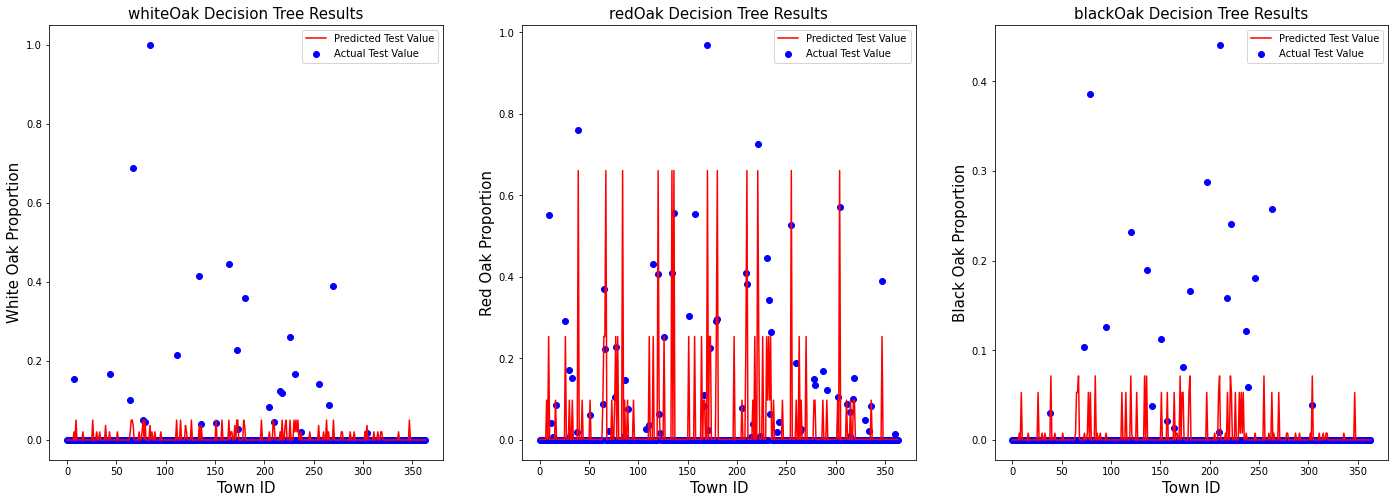

In [20]:

clf = DecisionTreeRegressor(max_depth = 2)
clf = clf.fit(x_train, y_train)
print('Decision Tree Score', clf.score(x_test,y_test))
y_pred = clf.predict(x_test)

fig, ax = plt.subplots(1, 3, figsize = (24,8))

ax[0].plot(np.arange(len(y_pred[:,0])), y_pred[:,0], color = 'red' ,label = 'Predicted Test Value')
ax[0].scatter(np.arange(len(y_test[:,0])), y_test[:,0], color = 'blue' ,label = 'Actual Test Value')
ax[0].set_title(f'{y_col[0]} Decision Tree Results', fontsize = 15)
ax[0].set_xlabel('Town ID', fontsize = 15)
ax[0].set_ylabel('White Oak Proportion', fontsize = 15)
ax[0].legend()

ax[1].plot(np.arange(len(y_pred[:,1])), y_pred[:,1], color = 'red' ,label = 'Predicted Test Value')
ax[1].scatter(np.arange(len(y_test[:,1])), y_test[:,1], color = 'blue' ,label = 'Actual Test Value')
ax[1].set_title(f'{y_col[1]} Decision Tree Results', fontsize = 15)
ax[1].set_xlabel('Town ID', fontsize = 15)
ax[1].set_ylabel('Red Oak Proportion', fontsize = 15)
ax[1].legend()

ax[2].plot(np.arange(len(y_pred[:,2])), y_pred[:,2], color = 'red' ,label = 'Predicted Test Value')
ax[2].scatter(np.arange(len(y_test[:,2])), y_test[:,2], color = 'blue' ,label = 'Actual Test Value')
ax[2].set_title(f'{y_col[2]} Decision Tree Results', fontsize = 15)
ax[2].set_xlabel('Town ID', fontsize = 15)
ax[2].set_ylabel('Black Oak Proportion', fontsize = 15)
ax[2].legend()

plt.show()

Random Forest Score 0.311324168721493


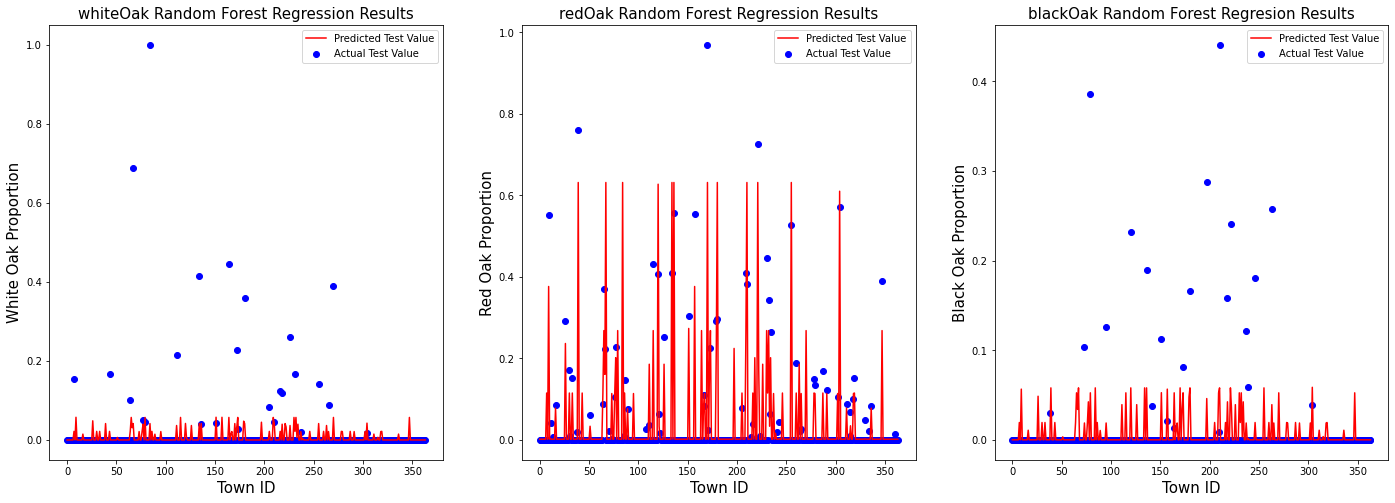

In [21]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth = 2)
clf = clf.fit(x_train, y_train)
print('Random Forest Score', clf.score(x_test,y_test))
y_pred = clf.predict(x_test)

fig, ax = plt.subplots(1, 3, figsize = (24,8))

ax[0].plot(np.arange(len(y_pred[:,0])), y_pred[:,0], color = 'red' ,label = 'Predicted Test Value')
ax[0].scatter(np.arange(len(y_test[:,0])), y_test[:,0], color = 'blue' ,label = 'Actual Test Value')
ax[0].set_title(f'{y_col[0]} Random Forest Regression Results', fontsize = 15)
ax[0].set_xlabel('Town ID', fontsize = 15)
ax[0].set_ylabel('White Oak Proportion', fontsize = 15)
ax[0].legend()

ax[1].plot(np.arange(len(y_pred[:,1])), y_pred[:,1], color = 'red' ,label = 'Predicted Test Value')
ax[1].scatter(np.arange(len(y_test[:,1])), y_test[:,1], color = 'blue' ,label = 'Actual Test Value')
ax[1].set_title(f'{y_col[1]} Random Forest Regression Results', fontsize = 15)
ax[1].set_xlabel('Town ID', fontsize = 15)
ax[1].set_ylabel('Red Oak Proportion', fontsize = 15)
ax[1].legend()

ax[2].plot(np.arange(len(y_pred[:,2])), y_pred[:,2], color = 'red' ,label = 'Predicted Test Value')
ax[2].scatter(np.arange(len(y_test[:,2])), y_test[:,2], color = 'blue' ,label = 'Actual Test Value')
ax[2].set_title(f'{y_col[2]} Random Forest Regresion Results', fontsize = 15)
ax[2].set_xlabel('Town ID', fontsize = 15)
ax[2].set_ylabel('Black Oak Proportion', fontsize = 15)
ax[2].legend()

plt.show()